## Guided Project: Investigating Fandango Movie Rating 

In October 2015, a journalist Walt Hickey published an article about strange observations on the Fandango website (https://www.fandango.com/) , a movie ratings aggregator. 
Source article:https://fivethirtyeight.com/features/fandango-movies-ratings/
For instance: 

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.
    
The website said they would fix it asap. 
**Our goal** is to investigate if Fandango has actually fixed fix their aggregating system.

*Source of the data*:

- Walt Hickey made the data he analyzed publicly available: https://github.com/fivethirtyeight/data/tree/master/fandango, so data BEFORE fixing
- one team member of Dataquest gathered the ratings for movie in 2016/2017:https://github.com/mircealex/Movie_ratings_2016_17 so data AFTER fixing
       
=> by compare the data we shouhd identify if the issues on Fandango website were fixed.... or not.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understand the datasets employed

Dataset used before the article:

In [70]:
fandango_score_compa = pd.read_csv('fandango_score_comparison.csv')

In [71]:
fandango_score_compa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [72]:
fandango_score_compa[['Fandango_Stars','Fandango_Ratingvalue']].head()

,Fandango_Stars,Fandango_Ratingvalue
0,5.0,4.5
1,5.0,4.5
2,5.0,4.5
3,5.0,4.5
4,3.5,3.0


In [73]:
movie_ratings_16_17= pd.read_csv('movie_ratings_16_17.csv')

In [74]:
movie_ratings_16_17.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [75]:
movie_ratings_16_17.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [76]:
movie_ratings_16_17[['audience','n_audience']]

,audience,n_audience
0,79,3.95
1,83,4.15
2,47,2.35
3,76,3.80
4,57,2.85
5,84,4.20
6,79,3.95
7,50,2.50
8,66,3.30
9,27,1.35


So the data are an aggregation of scoring value retrived from the website: Rotten tomato, Metacritic and IMBD, of in addition in the dataset before fixing there is the Fandango scoring.

In [77]:
#isolation of the Fandango info from both dataset

fandango_15 = fandango_score_compa[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

fandango_16_17 = movie_ratings_16_17[['movie','year','fandango']]

In [78]:
fandango_15.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [79]:
fandango_16_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


###### are the sample representative? 
 - the selectino of movie in the first dataset, we do not have the idea if it is representative 
 - in the second dataset, https://github.com/mircealex/Movie_ratings_2016_17/blob/master/Mv_ratings_project.ipynb, it is possible to see that the distribution of the IMDB rating for the sample of 214 movies look the same than a dataset of 4917 movie from Kaggle so we can conclude that the sample is representative. 
 
 the criteria of selection of the movie differ between the 

###### from the solution 
Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the README.md of the data set's repository, we can see that he used the following sampling criteria:

The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the README.md of the data set's repository):

The movie must have been released in 2016 or later.
The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.

### Changing the Goal of our Analysis

Because the dataset might be not representative, we gonna analyse if the anomalie detected in 2015 in Fandango is still present we gonna analyse the 
fandango ratings in 2015, and 2016.

### Isolating the Samples we Need


The definition of a popular movie with the firt dataset is to have 30 reviews on Fandango, is that the case for the movies of the second dataset ? 

In [80]:
#isolated movie released in 2016 in the second dataset 
fandango_2016= fandango_16_17[fandango_16_17['year']==2016]
# and let get a sample 
sample_movies_2016 = fandango_2016.sample(10, random_state= 1) #random state fixed for reproducibility
sample_movies_2016

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


    Very interesting, in 2020, the reviews and score are from Rotten Tomatoes.... so how do we juge, let's assume for the sake of this exercice that there are enough reviews on Fandango for all films in 2016

In [81]:
movie_ratings_16_17[movie_ratings_16_17['movie']=='Collide']

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
36,Collide,2016,33,5.7,19,39,3.5,1.65,2.85,0.95,1.95,1.5,3.0,1.0,2.0


In [82]:
#isolated the year the movie was released
fandango_15['year']=fandango_15['FILM'].apply(lambda x: x.replace('(','').replace(')','').split(' ')[-1])
fandango_15['year'] = fandango_15['year'].astype(int)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [83]:
#keeping only movie of 2015 in the first data set
fandango_2015 = fandango_15[fandango_15['year']==2015]

### Comparing Distribution Shapes for 2015 and 2016
Comparison of the distribution with a common kde plot

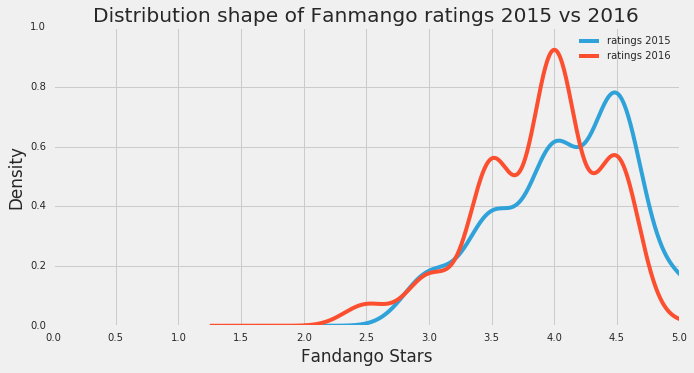

In [84]:
#to use the style fivethirtyeight
plt.style.use('fivethirtyeight')

#the fandango stars to plot 
fandango_2015['Fandango_Stars'].plot.kde(label='ratings 2015',
                                         legend=True,
                                         figsize=(10,5))
fandango_2016['fandango'].plot.kde(label= 'ratings 2016',legend= True)

#to make it beautiful
plt.xlabel('Fandango Stars')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Distribution shape of Fanmango ratings 2015 vs 2016',
         y=1)
#xticks can also be done with 
#plt.xticks(arange(0,5.1,.5))



- the distrubtion for the rating of the movies 2015 is a left skewed distry and for the 2016 slightly left skewed. 
- the shapes of both distribution are only similar at the level of the tail and 2016 is shifting a bit to the left with a mode of 4 while the mode in 2015 was 4.5
- we definitvely see a change in  between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016
- for movie in 2016 were rated lower than 2015

###  Comparing Relative Frequencies

There are more movies in the dataset of 2016 than 2015 so it makes no sense to use absolute frequencies for comparison, so we use relative frequencies. and easier to read %

###### Dataset movies 2015

In [85]:
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

###### Dataset movies 2016

In [86]:
fandango_2016['fandango'].value_counts(normalize= True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

- it makes sense that there is a difference as the highest % in 2015 was 4.5 stars while in 2016 it was 4 with 40%  and 10 times less of 5 starts
- the range for the ratin 2016 is larger with some 3% of vote of 2.5 stars when the minimim rating is 3 stars in 2015.
- direction of the change not clear compare the the kde plot!

###  Direction of the change

In [87]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()

mean_2016 = fandango_2016['fandango'].mean()
median_2016 =  fandango_2016['fandango'].median()
mode_2016 =  fandango_2016['fandango'].mode()

In [88]:
print('2015 mean was',mean_2015)
print('2015 median was', median_2015)
print('2015 mode was', mode_2015[0])

print('2016 mean was',mean_2016)
print('2016 median was', median_2016)
print('2016 mode was', mode_2016[0])

2015 mean was 4.0852713178294575
2015 median was 4.0
2015 mode was 4.5
2016 mean was 3.887434554973822
2016 median was 4.0
2016 mode was 4.0


in conclusion the median was the same for both years but with the higher mode and a higher average we can see the direction of the change.

In [89]:
#to plot as hist, having the data in dataframe is easier
fandango_statistics = pd.DataFrame()

In [90]:
#adding data 
fandango_statistics['2015']=[mean_2015,median_2015,mode_2015[0]]
fandango_statistics['2016']=[mean_2016,median_2016,mode_2016[0]]

In [91]:
#change the index of the DataFrame

fandango_statistics.set_index([['mean','median','mode']],inplace=True)

In [92]:
fandango_statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


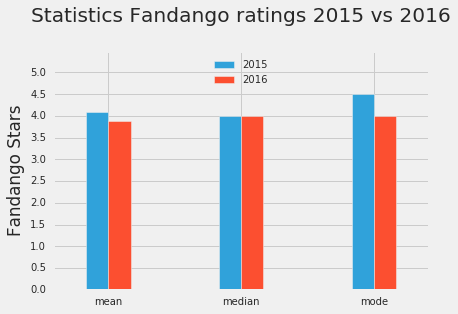

In [136]:
import numpy as np
from numpy import arange
fandango_statistics.plot.bar(legend=True,rot=0,width=1/3)
plt.title('Statistics Fandango ratings 2015 vs 2016',y=1.1)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.5,0.5))
plt.ylabel('Fandango Stars')
plt.legend(loc='upper center')


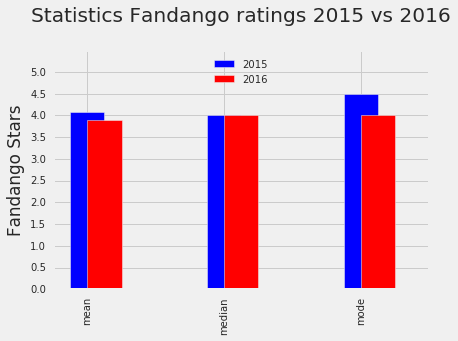

In [150]:
#another way
fandango_statistics['2015'].plot.bar(color = 'b',
                                     label='2015',
                                     width=1/4,
                                     align='center')
fandango_statistics['2016'].plot.bar(color = 'r',
                                     label='2016',
                                     width=1/4,
                                     align='edge')

plt.title('Statistics Fandango ratings 2015 vs 2016',y=1.1)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.5,0.5))
plt.ylabel('Fandango Stars')
plt.legend(loc='upper center')

### Conclusion
The comparison of the movie ratings of Fandango 2015 vs 2016 shows that movies in 2016 were rated slightly lower than in 2015 with a diffence in the mode of 0.5 stars. 

Did Fandango fix the *glitch* of their software? Maybe but we can't be for sure and the differences observed could be also due to another factor.

### to go further
- Customize your graphs more by reproducing almost completely the FiveThirtyEight style. You can take a look at this [tutorial](https://www.dataquest.io/blog/data-science-project-style-guide) if you want to do that.
- Improve your project from a stylistical point of view by following the guidelines discussed in this style guide.
Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check for a movie rating. There are many approaches you can take here — you can take some inspiration from this article.
- Collect recent movie ratings data and formulate your own research questions. You can take a look at this blog post to learn how to scrape movie ratings for IMDB and Metacritic.
